# Case Study
<p>Buat program python dengan VSM secara berkelompok. Buat sebuah korpus terlebih dahulu. Korpus boleh dari twitter, news, ataupun yang lain.

<p>Buat laporan hasil program dengan menentukan 5 kueri.

Dipresentasikan di pertemuan 11

 Korpus dari twitter tentang G20 Indonesia
* NLTK library for :
> Stemming English use Algo Porter <br>
> Stopwords english and Indonesia 
<br>
* Sastrawing for :     
> for stemming Indonesia text


In [1]:
# Install Library sastrawi
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd

# Get data

In [3]:
df_G20_non_hash=pd.read_csv("/content/dataset_twitter-scraper_G20.csv")
df_G20_hash=pd.read_csv("/content/dataset_twitter-scraper_G20_hash.csv")

In [4]:
df_G20_non_hash.head()

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user_mentions/0/screen_name,user_mentions/1/id_str,user_mentions/1/name,user_mentions/1/screen_name,user_mentions/2/id_str,user_mentions/2/name,user_mentions/2/screen_name,user_mentions/3/id_str,user_mentions/3/name,user_mentions/3/screen_name
0,1591778555083755520,2022-11-13T13:02:36.000Z,618,One Earth. One FAMILY. ONE Future !! \n\n#G20 ...,G20,G20India,G20Indonesia,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1591802671580995588,2022-11-13T14:38:25.000Z,929,"The G20 delegation has arrived in Bali, they r...",WonderfulIndonesia,G20Indonesia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1592038936142295040,2022-11-14T06:17:15.000Z,59,"Tomorrow, the 2022 G20 Bali Summit will be hel...",G20Indonesia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1592152351116333056,2022-11-14T13:47:55.000Z,1123,President Kagame joined President @Macky_Sall ...,G20Indonesia,NaN,NaN,NaN,NaN,NaN,...,Macky_Sall,2.987156e+09,Cyril Ramaphosa 🇿🇦,CyrilRamaphosa,149991703.0,Alberto Fernández,alferdez,1.976143e+09,Emmanuel Macron,EmmanuelMacron
4,1592254645853995010,2022-11-14T20:34:24.000Z,39,What did I just watch???? #XiJinping #BidenXiM...,XiJinping,BidenXiMeeting,G20Indonesia,G20BaliSummit,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_G20_hash.head()

,conversation_id,created_at,favorite_count,full_text,hashtags/0,hashtags/1,hashtags/2,hashtags/3,hashtags/4,hashtags/5,...,user/url,user/utc_offset,user/verified,user/want_retweets,user_mentions/0/id_str,user_mentions/0/name,user_mentions/0/screen_name,user_mentions/1/id_str,user_mentions/1/name,user_mentions/1/screen_name
0,1528684321254608896,2022-05-23T10:28:38.000Z,182022,Elon musk has changed Twitter like button from...,NaN,NaN,NaN,NaN,NaN,NaN,...,https://t.co/2cZkKNvlDx,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1592060213615812608,2022-11-14T07:41:48.000Z,1029,During the #G20Indonesia Indonesian 🇮🇩 Preside...,G20Indonesia,G20,G20India,NaN,NaN,NaN,...,https://t.co/DyRSJYDSzQ,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1592310386954731520,2022-11-15T00:15:54.000Z,324,📸 Here're group photos of #Fellas at various s...,Fellas,Bali,G20Indonesia,NAFOexpansion,NAFO,NAFOFellas,...,NaN,NaN,False,NaN,1.454347e+18,Vasyl Hamianin,VHamianin,NaN,NaN,NaN
3,1592313811121602561,2022-11-15T00:29:30.000Z,1350,Hari ini Indonesia jadi perhatian Dunia\n\nAda...,G20Indonesia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1592323692775833601,2022-11-15T02:08:41.000Z,59,France's Emmanuel Macron met with Xi Jinping o...,G20Indonesia2022,G20Indonesia,NaN,NaN,NaN,NaN,...,https://t.co/IH4P72QDIe,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning data

Concat dua data
> karena memakai API dari apify dilakukan pencarian korpus berdasar
hashtag dan tidak menggunakan hashtag agar korpus semakin banyak

In [6]:
df_G20_hash["full_text"],df_G20_non_hash["full_text"]

(0     Elon musk has changed Twitter like button from...
 1     During the #G20Indonesia Indonesian 🇮🇩 Preside...
 2     📸 Here're group photos of #Fellas at various s...
 3     Hari ini Indonesia jadi perhatian Dunia\n\nAda...
 4     France's Emmanuel Macron met with Xi Jinping o...
 5     Brown vintage dress ideas✨\n\n— a thread\n\nBa...
 6     🇮🇩G20 Indonesia 2022🇮🇩\n#hetalia #hwsindonesia...
 7     PM @narendramodi meet French 🇫🇷 President Emma...
 8     Hon'ble PM Shri @narendramodi Ji attends the #...
 9     Today in Bali, President Kagame attends the op...
 10    Watch Prime Minister @narendramodi and US Pres...
 11    President Xi Jinping at the G20 official welco...
 12    PM @narendramodi interacted with President Mac...
 13    Prime Ministers @narendramodi and Netherlands ...
 14    Together we are taking action.\n \nProductive ...
 15    ‘I’m having trouble reading this :#LostBiden i...
 16    President Kagame and Indonesian President Joko...
 17    dark-tone shoes reccomme

In [7]:
df_G20_hash["full_text"][0]

'Elon musk has changed Twitter like button from ❤️ to 💙 https://t.co/RJueV7OHyS'

dapat dilihat bahwa ada text elon musk yang tidak relevan terhadap berita G20 

## Gabungkan data terlebih dahulu

In [8]:
df_1=df_G20_hash["full_text"]
df_2=df_G20_non_hash["full_text"]

In [9]:
df_G20_=pd.concat([df_1, df_2], ignore_index=True)

In [10]:
df_G20_=pd.DataFrame({
    "full_text":df_G20_
}) # Simpan data yang sudah yang dsimpan kedalam dataframe

In [11]:
df_G20_.head()

,full_text
0,Elon musk has changed Twitter like button from...
1,During the #G20Indonesia Indonesian 🇮🇩 Preside...
2,📸 Here're group photos of #Fellas at various s...
3,Hari ini Indonesia jadi perhatian Dunia\n\nAda...
4,France's Emmanuel Macron met with Xi Jinping o...


## Bersihkan data tidak relevan terhadap berita G20

Melihat masing-masing data yang benar-benar relevan ke berita G20

In [12]:
df_G20_news_only=df_G20_["full_text"].map(lambda news : "G20" in news) # Gunakan fungsi map untuk perulangan agar hanya melihat korpus text yang mengandung kata  "G20"

In [13]:
df=df_G20_[df_G20_news_only]

In [14]:
df["full_text"]

1     During the #G20Indonesia Indonesian 🇮🇩 Preside...
2     📸 Here're group photos of #Fellas at various s...
3     Hari ini Indonesia jadi perhatian Dunia\n\nAda...
4     France's Emmanuel Macron met with Xi Jinping o...
6     🇮🇩G20 Indonesia 2022🇮🇩\n#hetalia #hwsindonesia...
7     PM @narendramodi meet French 🇫🇷 President Emma...
8     Hon'ble PM Shri @narendramodi Ji attends the #...
9     Today in Bali, President Kagame attends the op...
10    Watch Prime Minister @narendramodi and US Pres...
11    President Xi Jinping at the G20 official welco...
12    PM @narendramodi interacted with President Mac...
13    Prime Ministers @narendramodi and Netherlands ...
14    Together we are taking action.\n \nProductive ...
15    ‘I’m having trouble reading this :#LostBiden i...
16    President Kagame and Indonesian President Joko...
17    dark-tone shoes reccommendation 🖤\n\n—thread\n...
18    The US-India partnership 🇺🇸 🇮🇳\n\n@POTUS @nare...
19    President Kagame attends #G20Indonesia. ht

# Exploration text data

## Melihat berapa stopwords di data text

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
stop_en=stopwords.words('english')
stop_id=stopwords.words('indonesian')

In [29]:
import matplotlib.pyplot as plt
#code from https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/1-3-top-stopwords-barchart-b953763c-3fea-4331-bff0-429411793e5f/5c0fca05-ba07-4564-a02e-c44b08bfb8cb
def plot_top_stopwords_barchart(text):
    stop=stop_en+stop_id
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.figure(figsize=(15,10))
    plt.bar(x,y)
    plt.title("10 Stopwords yang sering muncul ")

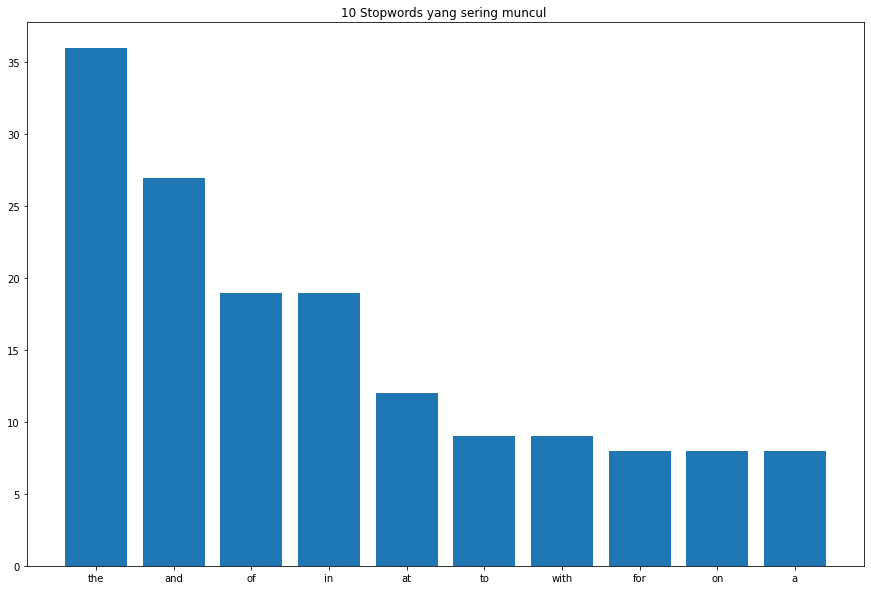

In [30]:
plot_top_stopwords_barchart(df["full_text"])

# Preprocessing text
> Remove Stopwords

> Stemming

> Case folding

In [31]:
import re
def caseFolding(text):
  text=text.lower()
  text=re.sub(r'[""]')